In [1]:
# -*- coding: utf-8 -*-
"""
Análise dos LCCs

Amanda V. A. de Luna e Costa
Lívia Calvalcanti Juliao

"""
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
%run analise.py

In [27]:
def z_mod(x, media,mad):
    m = (x - media) * 0.6745
    z_md = abs(m/mad)
    return float(z_md)

df = pd.read_csv("../data/logs2.csv",sep = ";")
ajeitando_df(df).head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13


# Identificando outliers e plotando kmeans

In [4]:
# Criando um data frame apenas com os acessos
df_acessos = df[["usuario"]].apply(pd.value_counts)
df_acessos.columns = ["acessos"]
df_acessos.head()

,acessos
616329888599911591,5198
3952875937242617029,5089
-8964805488632447931,4513
710203151364569887,4428
260012301744219973,4043


In [5]:
# Coletando dados estatísticos do data frame dos acessos
df_acessos.describe()

,acessos
count,995.000000
mean,414.371859
std,640.225118
min,1.000000
25%,37.000000
50%,184.000000
75%,503.500000
max,5198.000000


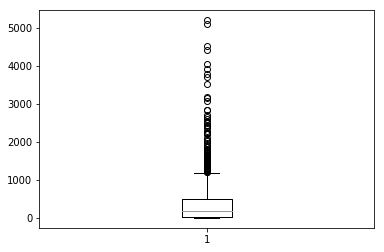

In [6]:
# Plotando o boxplot dos acessos
plt.boxplot(df_acessos["acessos"])
plt.show()

## Identificando possíveis outliers

In [7]:
media_acessos = df_acessos["acessos"].mean()
media_acessos

414.3718592964824

In [8]:
mediana_acessos = df_acessos["acessos"].median()
mediana_acessos

184.0

In [9]:
df_acessos["x-mediana"] = df_acessos["acessos"].apply(lambda x: abs(int(x) - mediana_acessos))
df_acessos.sort_values(by=['x-mediana'])

,acessos,x-mediana
-224930710256020865,184,0.0
-2121805090545450681,185,1.0
-6836071898683336601,185,1.0
-4015152259331783011,181,3.0
-1059446735651333741,181,3.0
-4821534548982177369,181,3.0
391057645280711829,180,4.0
7879483884156588471,190,6.0
8340291719543352165,190,6.0
3618336850642240507,177,7.0


In [10]:
mad = df_acessos["x-mediana"].median()
mad

167.0

In [11]:
df_acessos["z_modificado"] = df_acessos["acessos"].apply(lambda x : z_mod(int(x),media_acessos,mad))
df_acessos

,acessos,x-mediana,z_modificado
616329888599911591,5198,5014.0,19.320702
3952875937242617029,5089,4905.0,18.880459
-8964805488632447931,4513,4329.0,16.554040
710203151364569887,4428,4244.0,16.210732
260012301744219973,4043,3859.0,14.655747
4010185481155475087,3924,3740.0,14.175115
-818095743421438535,3788,3604.0,13.625821
-8029875674051901993,3696,3512.0,13.254241
-7994420641407581993,3532,3348.0,12.591857
-7548620409216467497,3174,2990.0,11.145923


In [12]:
verificando_outliers = pd.DataFrame()
verificando_outliers["is_outlier"] = df_acessos["z_modificado"] > 3.5
usuarios_outliers = verificando_outliers[verificando_outliers.is_outlier].index.values.tolist()

In [13]:
outliers = df[df["usuario"].isin(usuarios_outliers)].dropna()
outliers.head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
87,27/01/2016,08:30:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
91,27/01/2016,08:40:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
96,27/01/2016,08:50:15,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
101,27/01/2016,09:00:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,9,manha,08h-10h,21
105,27/01/2016,09:00:49,lcc2-27,8851394046529841223,2016,1,27,Qua,9,manha,08h-10h,27


In [14]:
outliers.tail()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
412279,15/02/2018,14:11:18,lcc2-14,-8964805488632447931,2018,2,15,Qui,14,tarde,14h-16h,14
412280,15/02/2018,14:11:21,lcc2-13,5732212761568358315,2018,2,15,Qui,14,tarde,14h-16h,13
412285,15/02/2018,14:20:07,lcc2-23,1244840843434056831,2018,2,15,Qui,14,tarde,14h-16h,23
412291,15/02/2018,14:20:33,lcc2-32,5682070817617030239,2018,2,15,Qui,14,tarde,14h-16h,32
412293,15/02/2018,14:20:38,lcc2-19,-304601087665306731,2018,2,15,Qui,14,tarde,14h-16h,19


In [15]:
nao_outliers = df[~df["usuario"].isin(usuarios_outliers)].dropna()
nao_outliers.head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13


In [16]:
df_sessao = pd.read_csv("../data/logs2Sessoes2.csv", sep=";").drop('Unnamed: 0', axis=1)
df_sessao = ajeitando_df(df_sessao)
df_sessao["outlier"] = False
mask = df_sessao["usuario"].isin(usuarios_outliers)
column_name = 'outlier'
df_sessao.loc[mask, column_name] = True

df_sessao_outlier = df_sessao.loc[df_sessao["outlier"] == True]
df_sessao_n_outlier = df_sessao.loc[df_sessao["outlier"] == False]

df_sessao.head()

,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier
0,26/01/2016,15:21:01,lcc2-28,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28,False
1,26/01/2016,15:21:04,lcc2-29,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29,False
2,26/01/2016,15:30:55,lcc2-39,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39,False
3,26/01/2016,15:31:20,lcc2-09,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,9,False
4,26/01/2016,15:31:23,lcc2-10,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,10,False


## Plotando características

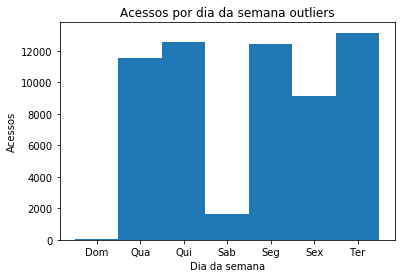

In [17]:
x = [i for i in range(8)]
plt.title("Acessos por dia da semana outliers")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df_sessao_outlier.dia_da_semana, bins = x,align="left")
plt.show()

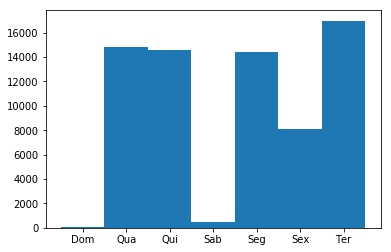

In [18]:
# x = [i for i in range(8)]
# plt.title("Acessos por dia da semana não outliers")
# plt.xlabel("Dia da semana")
# plt.ylabel("Acessos")
plt.hist(df_sessao_n_outlier.dia_da_semana, bins = x,align="left")
plt.show()

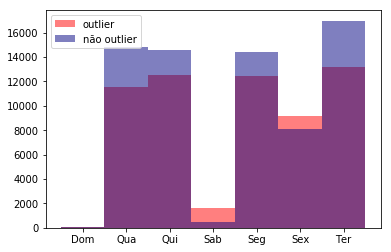

In [19]:
plt.hist(df_sessao_outlier.dia_da_semana, bins = x, alpha = 0.5, label='outlier', color = "red",align = "left")
plt.hist(df_sessao_n_outlier.dia_da_semana, bins = x, alpha = 0.5, label='não outlier', color = "navy",align="left")
plt.legend(loc='upper left')
plt.show()

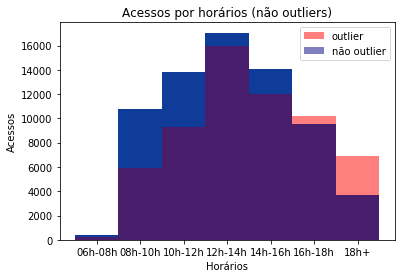

In [20]:
plt.title("Acessos por horários (não outliers)")
plt.xlabel("Horários")
plt.ylabel("Acessos")
plt.hist(df_sessao_n_outlier.intervalo, bins = x,align ="left")
plt.hist(df_sessao_outlier.intervalo, bins = x, alpha = 0.5, label='outlier', color = "red",align = "left")
plt.hist(df_sessao_n_outlier.intervalo, bins = x, alpha = 0.5, label='não outlier', color = "navy",align="left")
plt.legend(loc='upper right')
plt.show()

In [21]:
def intervalo_sessao(df):
    
    from datetime import datetime
    df_sessao_outlier["duracao"] = ""
    formato = "%H:%M:%S"
    data_anterior = ""
    maquina_anterior = ""
    sessao_anterior = ""
    hora_anterior = ""
    usuario_anterior = ""

    for index, logs in df.iterrows():
        if sessao_anterior == "opened":
            if logs["sessao"] == "closed" and logs["usuario"] == usuario_anterior and logs["maquina"] == maquina_anterior and logs["data"] == data_anterior:
                df.at[index, "duracao"] = (datetime.strptime(logs["hora"],formato) - (datetime.strptime(hora_anterior,formato)))
        if logs["sessao"] == "opened":
            sessao_anterior = "opened"
            data_anterior = logs["data"]
            maquina_anterior = logs["maquina"]
            hora_anterior = logs["hora"]
            usuario_anterior = logs["usuario"]
        else:
            sessao_anterior = "closed"
            data_anterior = ""
            maquina_anterior = ""
            sessao_anterior = ""
            hora_anterior = ""
            usuario_anterior = ""
            
    return df

In [22]:
df_sessao_outlier = intervalo_sessao(df_sessao_outlier)
df_duracao_sessao_outlier = df_sessao_outlier[df_sessao_outlier.duracao != ""].drop(["sessao", "hora"], axis = 1).sort_values(by='duracao')
df_duracao_sessao_outlier.head()

/home/livia.cavalcanti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,data,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
56834,16/03/2016,lcc2-01,260012301744219973,2016,3,16,Qua,18,noite,18h+,1,True,0:00:06
65646,08/08/2016,lcc2-12,5772359113678627871,2016,8,8,Seg,14,tarde,14h-16h,12,True,0:00:08
5075,08/11/2016,lcc2-02,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,0:00:38
24907,08/11/2016,lcc2-02,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,0:00:38
35147,09/05/2016,lcc2-03,-3119048470145123191,2016,5,9,Seg,14,tarde,14h-16h,3,True,0:01:05


In [23]:
df_sessao_n_outlier = intervalo_sessao(df_sessao_n_outlier)
df_duracao_sessao_n_outlier = df_sessao_n_outlier[df_sessao_n_outlier.duracao != ""].drop(["sessao", "hora"], axis = 1).sort_values(by='duracao')
df_duracao_sessao_n_outlier.head()


/home/livia.cavalcanti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/livia.cavalcanti/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/livia.cavalcanti/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,data,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
2217,28/01/2016,lcc2-15,-7258716506085809707,2016,1,28,Qui,12,manha,12h-14h,15,False,00:00:00
7251,15/03/2016,lcc2-19,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,00:00:00
43378,17/10/2016,lcc2-05,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,00:00:03
103582,27/07/2016,lcc2-40,-7446963053336319563,2016,7,27,Qua,16,tarde,16h-18h,40,False,00:00:16
87938,11/08/2016,lcc2-03,-1442416312388872333,2016,8,11,Qui,9,manha,08h-10h,3,False,00:00:36


In [24]:
df_geral = intervalo_sessao(df_sessao)
df_geral = df_geral[df_geral.duracao.notnull()].sort_values(by='duracao')
df_geral

/home/livia.cavalcanti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
2217,28/01/2016,12:21:09,lcc2-15,closed,-7258716506085809707,2016,1,28,Qui,12,manha,12h-14h,15,False,00:00:00
7251,15/03/2016,14:00:35,lcc2-19,closed,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,00:00:00
43378,17/10/2016,14:32:53,lcc2-05,closed,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,00:00:03
56834,16/03/2016,18:01:49,lcc2-01,closed,260012301744219973,2016,3,16,Qua,18,noite,18h+,1,True,00:00:06
65646,08/08/2016,14:41:53,lcc2-12,closed,5772359113678627871,2016,8,8,Seg,14,tarde,14h-16h,12,True,00:00:08
103582,27/07/2016,16:20:13,lcc2-40,closed,-7446963053336319563,2016,7,27,Qua,16,tarde,16h-18h,40,False,00:00:16
87938,11/08/2016,09:43:09,lcc2-03,closed,-1442416312388872333,2016,8,11,Qui,9,manha,08h-10h,3,False,00:00:36
5075,08/11/2016,15:02:23,lcc2-02,closed,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,00:00:38
24907,08/11/2016,15:02:23,lcc2-02,closed,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,00:00:38
35147,09/05/2016,14:12:52,lcc2-03,closed,-3119048470145123191,2016,5,9,Seg,14,tarde,14h-16h,3,True,00:01:05


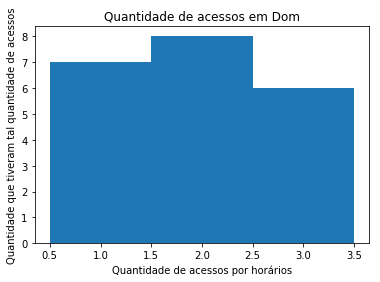

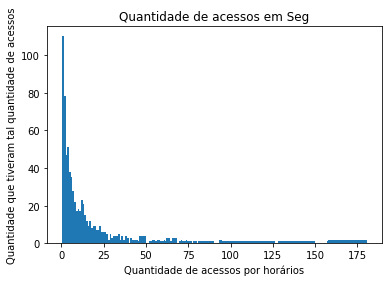

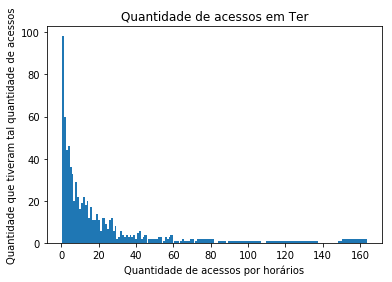

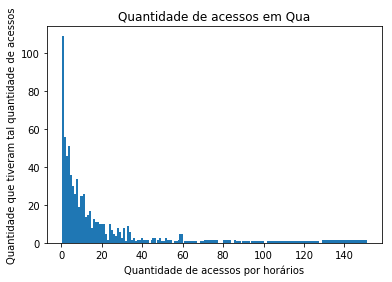

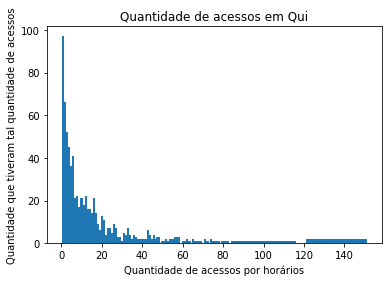

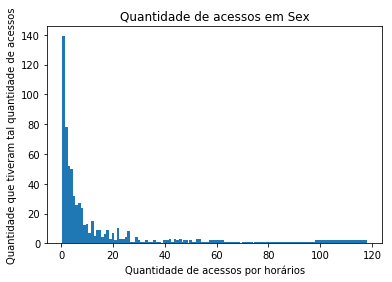

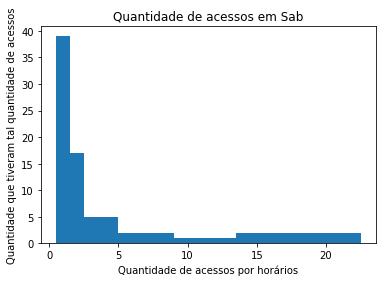

In [25]:
df_dia_semana = df_geral.groupby(['usuario','dia_da_semana']).count()
df_dia_semana.reset_index(inplace=True)
x = ['Dom','Seg','Ter','Qua','Qui','Sex','Sab']
for valor in x:
    plt.title("Quantidade de acessos em " + str(valor))
    plt.xlabel("Quantidade de acessos por horários")
    plt.ylabel("Quantidade que tiveram tal quantidade de acessos")
    plt.hist(df_dia_semana[df_dia_semana['dia_da_semana'] == valor].maquina, bins = np.sort(df_dia_semana[df_dia_semana['dia_da_semana'] == valor].data.unique()),align="left")
    plt.show()


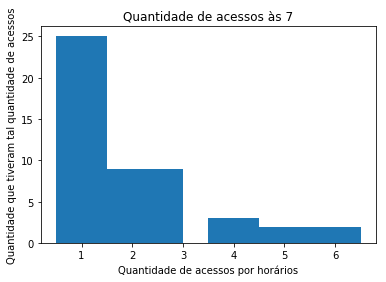

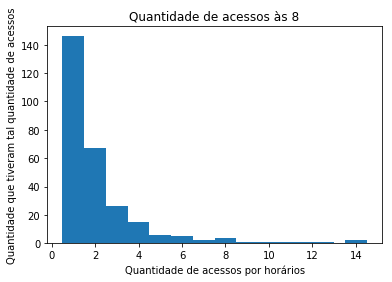

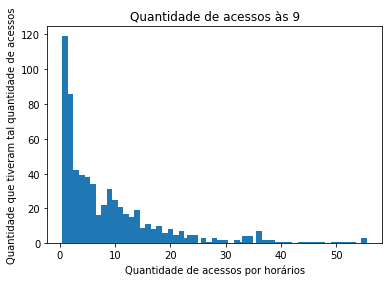

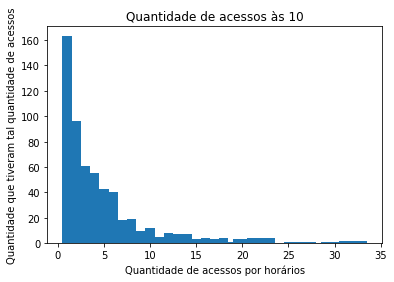

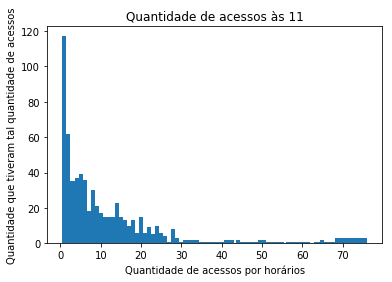

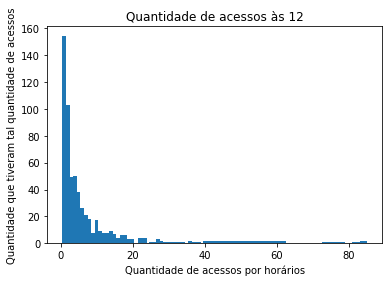

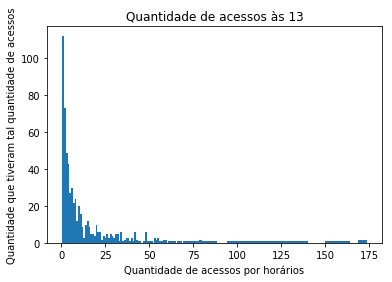

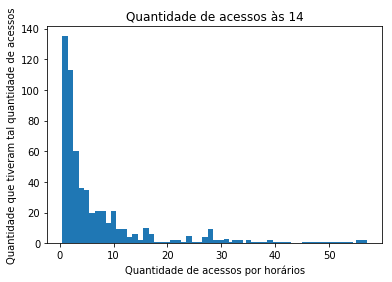

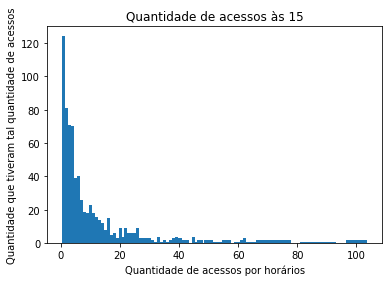

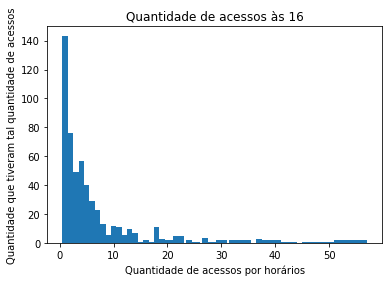

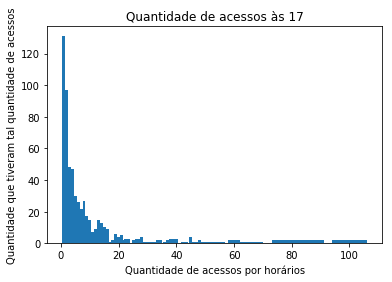

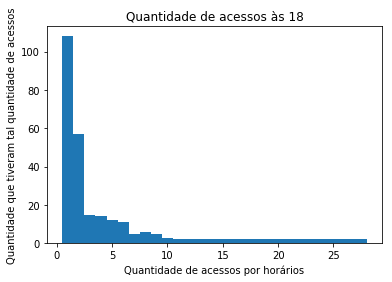

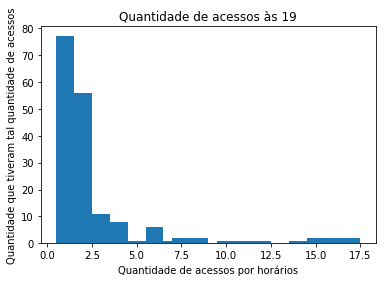

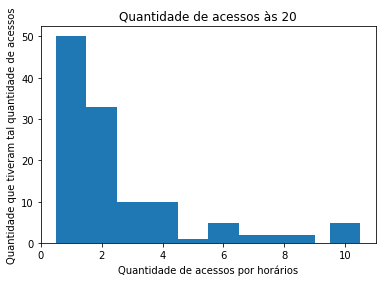

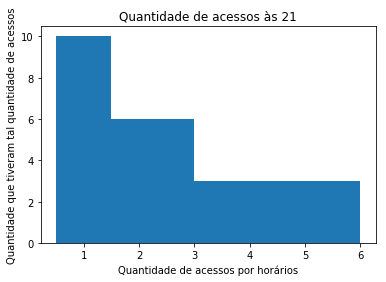

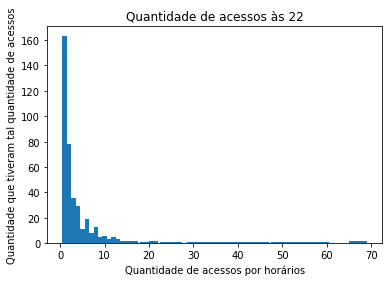

In [26]:
x = [i for i in range(7,23)]
oi = df_geral.groupby(['usuario','hora_pura']).count().reset_index()
oi['hora1'] = oi['hora_pura']

for valor in x:
    plt.title("Quantidade de acessos às " + str(valor))
    plt.xlabel("Quantidade de acessos por horários")
    plt.ylabel("Quantidade que tiveram tal quantidade de acessos")
    plt.hist(oi[oi['hora1'] == valor].maquina, bins = np.sort(oi[oi['hora1'] == valor].data.unique()),align="left")
    plt.show()



## K-Means

In [50]:
df_acessos = df[["usuario","intervalo"]]
df_acessos_horarios = (df_acessos.groupby(["usuario","intervalo"]).size()).unstack().fillna(0)
X = df_acessos_horarios.values
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
kmeans.cluster_centers_

array([[  6.57692308e+00,   2.26500000e+02,   3.80346154e+02,
          7.56307692e+02,   7.26769231e+02,   5.65961538e+02,
          5.26692308e+02],
       [  5.93975904e-01,   3.26542169e+01,   4.34698795e+01,
          3.36710843e+01,   3.67807229e+01,   2.48566265e+01,
          1.85228916e+01],
       [  3.53956835e+00,   1.27827338e+02,   1.98028777e+02,
          2.98338129e+02,   2.89338129e+02,   1.83374101e+02,
          1.31395683e+02]])

In [52]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2,

1 95409472.0864
2 46512959.1041
3 32088034.6363
4 26679422.603
5 22091210.3636
6 20313573.5908
7 18048210.949
8 16813984.5399
9 16012939.6264
10 15347126.4616


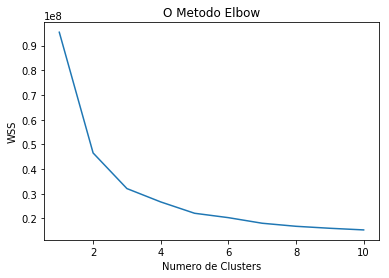

In [39]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

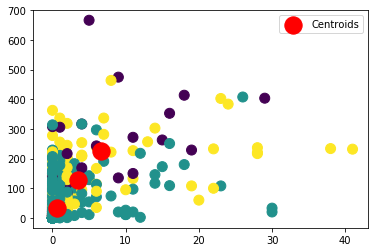

In [53]:
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.legend()
plt.show()